In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("C:/Users/shirl/OneDrive/Desktop/python/exposure_to_new.csv")

In [6]:
import seaborn as sns

In [7]:
import matplotlib.pyplot as plt

In [8]:
%matplotlib inline

In [9]:
df.head()

,date,exposure,rank,hot,search,new_user
0,2020/1/1,150538,13,8370,16358,2373
1,2020/1/2,198625,15,8561,21785,3201
2,2020/1/3,189144,17,8464,18835,3013
3,2020/1/4,157297,17,8352,15922,2724
4,2020/1/5,143070,18,8370,16358,2473


In [10]:
# Find Independent Variable

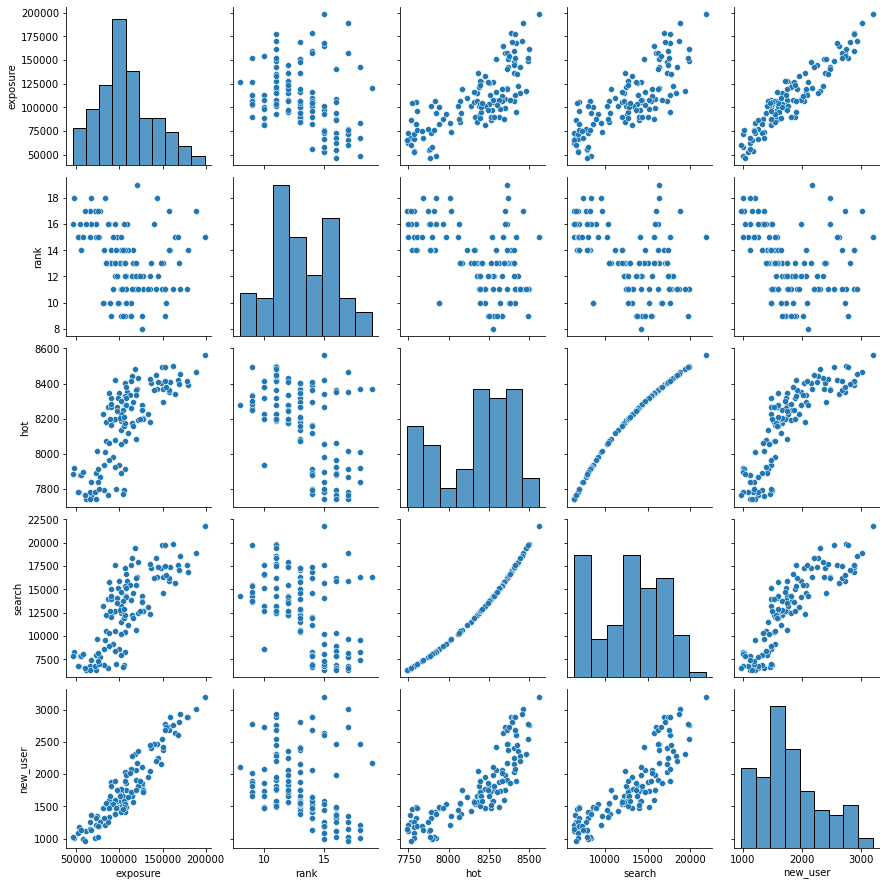

In [11]:
sns.pairplot(df)
plt.show()

In [12]:
# Correlation coefficient heat map

In [13]:
corr = df.corr()

<AxesSubplot:>

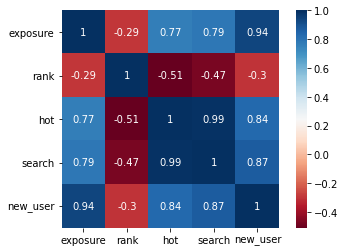

In [14]:
sns.heatmap(corr,cmap="RdBu",square=True,annot=True)

In [15]:
# Exposure,hot and search are highly correlated with the number of new_user

In [16]:
x = df[["exposure","hot","search"]]

In [17]:
y = df["new_user"]

In [18]:
# Build and find the best regression model

In [19]:
from sklearn.linear_model import LinearRegression, BayesianRidge, ElasticNet

In [20]:
from sklearn.svm import SVR

In [21]:
from sklearn.ensemble import GradientBoostingRegressor

In [22]:
from sklearn import metrics

In [23]:
from sklearn.model_selection import cross_val_score

In [24]:
model_list = [LinearRegression, BayesianRidge, ElasticNet, SVR, GradientBoostingRegressor]

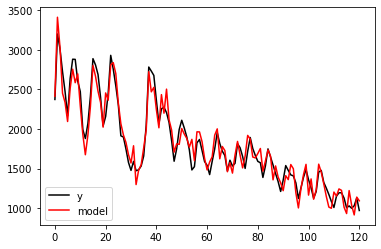

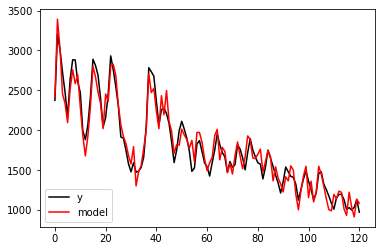

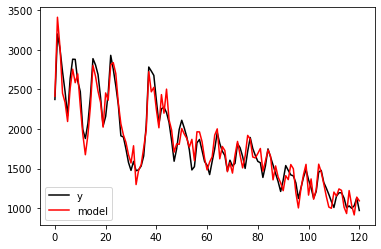

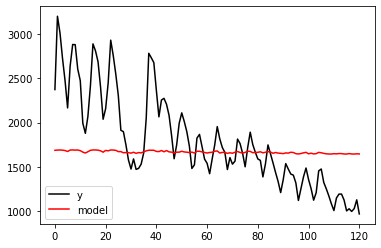

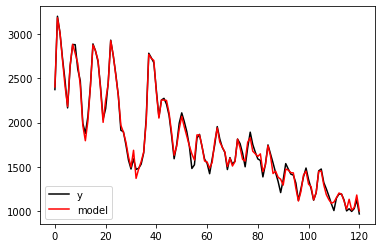

In [25]:
for model in model_list:
    model = model()
    model.fit(x,y)
    pre_y = model.predict(x)
    plt.figure()
    plt.plot(df.index, y, color = "k", label = "y")
    plt.plot(df.index, pre_y, color = "red", label = "model")
    plt.legend(loc = "lower left")
    plt.show()

In [26]:
# Through the line chart comparison, the last function(GradientBoostingRegressor) should be the best model,
# but we still need to evaluate the parameters of the regression model & cross-validation

In [27]:
import numpy as np

In [37]:

for model in model_list:
    model = model()
    model.fit(x,y)
    pre_y = model.predict(x)
    MAE = metrics.mean_absolute_error(y, pre_y)
    MSE = metrics.mean_squared_error(y, pre_y)
    R2 = metrics.r2_score(y,pre_y)
    EV = metrics.explained_variance_score(y,pre_y)
    print(MAE)
    print(MSE)
    print(R2)
    print(EV)
    accuracy_score = cross_val_score(model,x,y,cv=5)
    S_mean = abs(accuracy_score).mean()
    print(accuracy_score)
    print(S_mean)




104.70755151599529
16186.220734256036
0.9426160122140755
0.9426160122140755
[0.67029135 0.86609263 0.49510377 0.56271191 0.54164727]
0.627169386752766
104.95696353744098
16231.798739763977
0.9424544273849598
0.9424544273849598
[ 0.65804006  0.86950902  0.45486167  0.54148307 -0.8089622 ]
0.666571203812757
104.70805472718412
16186.22282665413
0.9426160047960285
0.9426160047960285
[0.67021042 0.86611606 0.49496244 0.56263545 0.5419497 ]
0.627174812810031
409.09178124823444
285140.55966279394
-0.010890847320048858
0.0479478428221517
[ -8.0009299   -0.8521606   -0.06634462  -1.42138702 -15.47964062]
5.164092552916209
34.02464746295462
2152.7950790938453
0.9923678313454065
0.9923678313454065
[0.34944317 0.79621946 0.45400202 0.62440634 0.18752504]
0.48231920623483615
